 
<h1 style='background-color: #6495ED; font-family:newtimeroman; font-size:200%; text-align:center; border-radius: 15px 50px;' > STROKE PREDICTION  </h1>

## IMPORTING LIBRARIES

In [41]:
import pandas as pd  #IMPORTING PANDAS
import numpy as np   #IMPORTING NUMPY
import matplotlib.pyplot as plt#IMPORTING MATHPLOT LIB FOR DATAVISULIZATION
%matplotlib inline
import seaborn as sns              #IMPORTING SEABORN FOR DATAVISULIZATION


import warnings                  
warnings.simplefilter("ignore")

## Loading up the data

In [20]:
df = pd.read_csv("healthcare-dataset-stroke-data.csv")     
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,67,Female,17.0,0,0,No,Private,Urban,92.97,NaN,formerly smoked,0
1,77,Female,13.0,0,0,No,children,Rural,85.81,18.6,Unknown,0
2,84,Male,55.0,0,0,Yes,Private,Urban,89.17,31.5,never smoked,0
3,91,Female,42.0,0,0,No,Private,Urban,98.53,18.5,never smoked,0
4,99,Female,31.0,0,0,No,Private,Urban,108.89,52.3,Unknown,0


In [21]:
df.head(10)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,67,Female,17.0,0,0,No,Private,Urban,92.97,NaN,formerly smoked,0
1,77,Female,13.0,0,0,No,children,Rural,85.81,18.6,Unknown,0
2,84,Male,55.0,0,0,Yes,Private,Urban,89.17,31.5,never smoked,0
3,91,Female,42.0,0,0,No,Private,Urban,98.53,18.5,never smoked,0
4,99,Female,31.0,0,0,No,Private,Urban,108.89,52.3,Unknown,0
5,121,Female,38.0,0,0,Yes,Private,Urban,91.44,NaN,Unknown,0
6,129,Female,24.0,0,0,No,Private,Urban,97.55,26.2,never smoked,0
7,132,Female,80.0,0,0,Yes,Govt_job,Urban,84.86,NaN,Unknown,0
8,156,Female,33.0,0,0,Yes,Private,Rural,86.97,42.2,never smoked,0
9,163,Female,20.0,0,0,No,Private,Rural,94.67,28.8,Unknown,0


In [22]:
df.columns   # NO OF COLUMNS 

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

## DROPPING UNWANTED COLUMNS

In [6]:
df.drop("id", axis=1, inplace=True)  # Dropping column 'id' as it can cause unwanted correlation. it is unique identifier

In [7]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Female,17.0,0,0,No,Private,Urban,92.97,NaN,formerly smoked,0
1,Female,13.0,0,0,No,children,Rural,85.81,18.6,Unknown,0
2,Male,55.0,0,0,Yes,Private,Urban,89.17,31.5,never smoked,0
3,Female,42.0,0,0,No,Private,Urban,98.53,18.5,never smoked,0
4,Female,31.0,0,0,No,Private,Urban,108.89,52.3,Unknown,0


In [9]:
df.shape   #for number of columns and rows 

(5110, 11)

In [15]:
print("THE NUMBER OF ROWS/RECORDS : 5110")

print("THE NUMBER OF COLUMNS/ATTRIBUTES : 11")

THE NUMBER OF ROWS/RECORDS : 5110
THE NUMBER OF COLUMNS/ATTRIBUTES : 11


In [14]:
df.info()  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                4909 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 439.3+ KB


## VARIABLE DESCRIPTION

* id: unique identifier  (already Dropped ) 
* gender: "Male", "Female" or "Other"
* age: age of the patient
* hypertension: 0 if the patient doesn't have hypertension, 1 if the patient has hypertension
* heart_disease: 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease
* ever_married: "No" or "Yes"
* work_type: "children", "Govt_jov", "Never_worked", "Private" or "Self-employed"
* Residence_type: "Rural" or "Urban"
* avg_glucose_level: average glucose level in blood
* bmi: body mass index
* smoking_status: "formerly smoked", "never smoked", "smokes" or "Unknown"*
* stroke: 1 if the patient had a stroke or 0 if not

## CHECKING FOR NULL VALUES  (data preprocessing)

In [24]:
df.isna()   #give true if there is null value viceversa

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,False,False,False,False,False,False,False,False,False,True,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,False,False,False,False,False,False,False,False,False,False,False,False
5106,False,False,False,False,False,False,False,False,False,False,False,False
5107,False,False,False,False,False,False,False,False,False,False,False,False
5108,False,False,False,False,False,False,False,False,False,False,False,False


In [26]:
df.isna().sum()   #gives count of null values in each column

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [35]:
#PRINTING ALL THE NULL VALUES
print("total no of null values in healthcare-dataset-stroke-data-------->",df.isnull().sum().sum())

total no of null values in healthcare-dataset-stroke-data--------> 0


## FILLING THE NULL VALUES

In [30]:
#from sklearn.impute import SimpleImputer

In [31]:
from sklearn.impute import KNNImputer

In [32]:
imputer = KNNImputer(n_neighbors = 5)                          # imputing  the null values in BMI
df['bmi'] = imputer.fit_transform(df[['bmi']])

In [34]:
df.isna().sum()     #checking for null values again

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [36]:
#PRINTING ALL THE NULL VALUES
print("total no of null values in healthcare-dataset-stroke-data-------->",df.isnull().sum().sum())   

total no of null values in healthcare-dataset-stroke-data--------> 0


## Exploratory Data Analysis

### CHECKING NO OF STROKE OCCURANCE IN DATASET

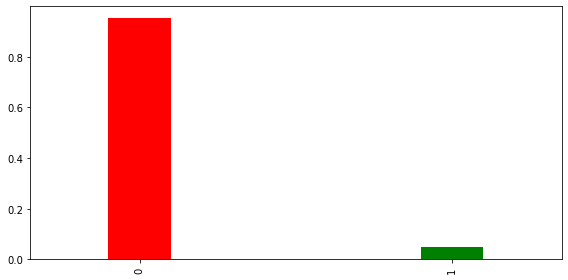

In [37]:
fig, axes = plt.subplots(figsize=(8, 4))
df['stroke'].value_counts(normalize=True).plot.bar(width=0.2, color=('red','green'))

plt.tight_layout()
plt.show()

### CATEGORICAL COLUMNS

In [38]:
df.gender.value_counts()    

Female    2994
Male      2115
Other        1
Name: gender, dtype: int64

<AxesSubplot:xlabel='gender', ylabel='count'>

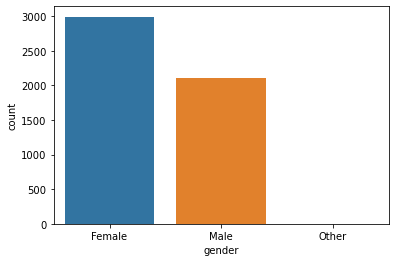

In [43]:
sns.countplot(df['gender'])   # graph for gender

<AxesSubplot:xlabel='ever_married', ylabel='count'>

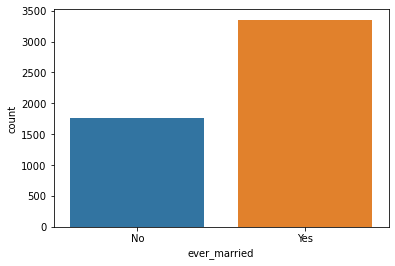

In [42]:
sns.countplot(df['ever_married'])

<AxesSubplot:xlabel='work_type', ylabel='count'>

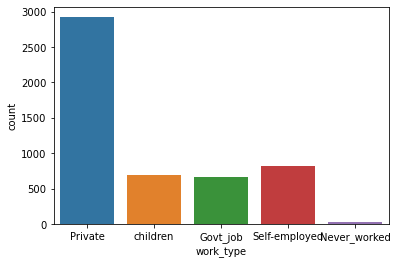

In [44]:
sns.countplot(df['work_type'])

<AxesSubplot:xlabel='Residence_type', ylabel='count'>

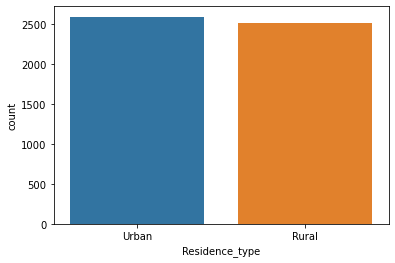

In [45]:
sns.countplot(df['Residence_type'])

<AxesSubplot:xlabel='Residence_type', ylabel='count'>

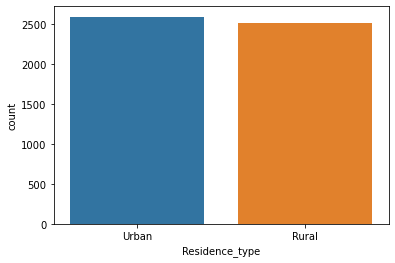

In [46]:
sns.countplot(df['Residence_type'])

## Handle categorical columns

In [47]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,67,Female,17.0,0,0,No,Private,Urban,92.97,28.893237,formerly smoked,0
1,77,Female,13.0,0,0,No,children,Rural,85.81,18.600000,Unknown,0
2,84,Male,55.0,0,0,Yes,Private,Urban,89.17,31.500000,never smoked,0
3,91,Female,42.0,0,0,No,Private,Urban,98.53,18.500000,never smoked,0
4,99,Female,31.0,0,0,No,Private,Urban,108.89,52.300000,Unknown,0


In [129]:
df.gender.value_counts()

Female    2994
Male      2115
Other        1
Name: gender, dtype: int64

## LABEL ENCODING 

#### One Hot Encoding is the binary representation of categorical variables. This process requires categorical values to be mapped to integer values first. Next, each integer value is represented as a binary vector with all values zero except the integer index marked with 1.


#### One Hot Encoding makes the representation of categorical data more expressive and easy. Many machine learning algorithms cannot work directly with categorical data, so categories must be converted to numbers. This operation is required for input and output variables that are categorical.

#### In this part, we converted categorical datas to the binary values. This operation increases the accuracy.


In [ ]:
# gender = pd.get_dummies(df[['gender']], drop_first= True)
gender.head()

In [52]:
df['smoking_status'].value_counts()

never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: smoking_status, dtype: int64

In [53]:
df.smoking_status.unique()

array(['formerly smoked', 'Unknown', 'never smoked', 'smokes'],
      dtype=object)

In [54]:
married = pd.get_dummies(df[['ever_married']], drop_first= True)
married.head()

,ever_married_Yes
0,0
1,0
2,1
3,0
4,0


In [55]:
df.work_type.value_counts()

Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: work_type, dtype: int64

In [56]:
work = pd.get_dummies(df[['work_type']], drop_first= True)
work.head()

,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children
0,0,1,0,0
1,0,0,0,1
2,0,1,0,0
3,0,1,0,0
4,0,1,0,0


In [57]:
residence = pd.get_dummies(df[['Residence_type']], drop_first= True)
residence.head()

,Residence_type_Urban
0,1
1,0
2,1
3,1
4,1


In [58]:
smoking = pd.get_dummies(df[['smoking_status']], drop_first= True)
smoking.head()

,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,1,0,0
1,0,0,0
2,0,1,0
3,0,1,0
4,0,0,0


In [59]:
data = pd.concat([df, gender, married, work, residence, smoking], axis = 1)
data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,...,gender_Other,ever_married_Yes,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,67,Female,17.0,0,0,No,Private,Urban,92.97,28.893237,...,0,0,0,1,0,0,1,1,0,0
1,77,Female,13.0,0,0,No,children,Rural,85.81,18.600000,...,0,0,0,0,0,1,0,0,0,0
2,84,Male,55.0,0,0,Yes,Private,Urban,89.17,31.500000,...,0,1,0,1,0,0,1,0,1,0
3,91,Female,42.0,0,0,No,Private,Urban,98.53,18.500000,...,0,0,0,1,0,0,1,0,1,0
4,99,Female,31.0,0,0,No,Private,Urban,108.89,52.300000,...,0,0,0,1,0,0,1,0,0,0


In [64]:
categorical_features = ['gender', 'ever_married', 'work_type', 'Residence_type','smoking_status']

In [65]:
data = data.drop(columns=categorical_features, axis=1)
data.head()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Male,gender_Other,ever_married_Yes,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,17.0,0,0,92.97,28.893237,0,0,0,0,0,1,0,0,1,1,0,0
1,13.0,0,0,85.81,18.600000,0,0,0,0,0,0,0,1,0,0,0,0
2,55.0,0,0,89.17,31.500000,0,1,0,1,0,1,0,0,1,0,1,0
3,42.0,0,0,98.53,18.500000,0,0,0,0,0,1,0,0,1,0,1,0
4,31.0,0,0,108.89,52.300000,0,0,0,0,0,1,0,0,1,0,0,0


In [61]:
data = data.drop(columns="id" , axis=1)
data.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,...,gender_Other,ever_married_Yes,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,Female,17.0,0,0,No,Private,Urban,92.97,28.893237,formerly smoked,...,0,0,0,1,0,0,1,1,0,0
1,Female,13.0,0,0,No,children,Rural,85.81,18.600000,Unknown,...,0,0,0,0,0,1,0,0,0,0
2,Male,55.0,0,0,Yes,Private,Urban,89.17,31.500000,never smoked,...,0,1,0,1,0,0,1,0,1,0
3,Female,42.0,0,0,No,Private,Urban,98.53,18.500000,never smoked,...,0,0,0,1,0,0,1,0,1,0
4,Female,31.0,0,0,No,Private,Urban,108.89,52.300000,Unknown,...,0,0,0,1,0,0,1,0,0,0


In [62]:
data.shape

(5110, 22)

In [63]:
data.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke', 'gender_Male', 'gender_Other',
       'ever_married_Yes', 'work_type_Never_worked', 'work_type_Private',
       'work_type_Self-employed', 'work_type_children', 'Residence_type_Urban',
       'smoking_status_formerly smoked', 'smoking_status_never smoked',
       'smoking_status_smokes'],
      dtype='object')

## Split dataset into train and test

In [66]:
data.head(10)

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Male,gender_Other,ever_married_Yes,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,17.0,0,0,92.97,28.893237,0,0,0,0,0,1,0,0,1,1,0,0
1,13.0,0,0,85.81,18.600000,0,0,0,0,0,0,0,1,0,0,0,0
2,55.0,0,0,89.17,31.500000,0,1,0,1,0,1,0,0,1,0,1,0
3,42.0,0,0,98.53,18.500000,0,0,0,0,0,1,0,0,1,0,1,0
4,31.0,0,0,108.89,52.300000,0,0,0,0,0,1,0,0,1,0,0,0
5,38.0,0,0,91.44,28.893237,0,0,0,1,0,1,0,0,1,0,0,0
6,24.0,0,0,97.55,26.200000,0,0,0,0,0,1,0,0,1,0,1,0
7,80.0,0,0,84.86,28.893237,0,0,0,1,0,0,0,0,1,0,0,0
8,33.0,0,0,86.97,42.200000,0,0,0,1,0,1,0,0,0,0,1,0
9,20.0,0,0,94.67,28.800000,0,0,0,0,0,1,0,0,0,0,0,0


In [67]:
x = data.drop("stroke", axis=1)
x.head()                                  #dropping target variable

,age,hypertension,heart_disease,avg_glucose_level,bmi,gender_Male,gender_Other,ever_married_Yes,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,17.0,0,0,92.97,28.893237,0,0,0,0,1,0,0,1,1,0,0
1,13.0,0,0,85.81,18.600000,0,0,0,0,0,0,1,0,0,0,0
2,55.0,0,0,89.17,31.500000,1,0,1,0,1,0,0,1,0,1,0
3,42.0,0,0,98.53,18.500000,0,0,0,0,1,0,0,1,0,1,0
4,31.0,0,0,108.89,52.300000,0,0,0,0,1,0,0,1,0,0,0


In [68]:
y = data[['stroke']]
y.head()                               #only target variable

,stroke
0,0
1,0
2,0
3,0
4,0


## Scaling the data 

In [69]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x = scaler.fit_transform(x)

In [72]:
x

array([[-1.15993415, -0.32860186, -0.2389468 , ...,  2.1849511 ,
        -0.7667743 , -0.42731326],
       [-1.33684362, -0.32860186, -0.2389468 , ..., -0.45767615,
        -0.7667743 , -0.42731326],
       [ 0.52070586, -0.32860186, -0.2389468 , ..., -0.45767615,
         1.30416474, -0.42731326],
       ...,
       [ 0.07843218, -0.32860186, -0.2389468 , ...,  2.1849511 ,
        -0.7667743 , -0.42731326],
       [ 0.43225112,  3.04319637, -0.2389468 , ..., -0.45767615,
        -0.7667743 , -0.42731326],
       [-1.82334467, -0.32860186, -0.2389468 , ..., -0.45767615,
        -0.7667743 , -0.42731326]])

## SPILITTING THE DATA

In [71]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)     

In [73]:
x_train

array([[-0.71766046, -0.32860186, -0.2389468 , ..., -0.45767615,
        -0.7667743 ,  2.34020354],
       [-0.0984773 , -0.32860186, -0.2389468 , ..., -0.45767615,
        -0.7667743 , -0.42731326],
       [-0.71766046, -0.32860186, -0.2389468 , ..., -0.45767615,
         1.30416474, -0.42731326],
       ...,
       [ 1.53793534,  3.04319637, -0.2389468 , ..., -0.45767615,
        -0.7667743 , -0.42731326],
       [-1.86403385, -0.32860186, -0.2389468 , ..., -0.45767615,
        -0.7667743 , -0.42731326],
       [ 1.58216271, -0.32860186, -0.2389468 , ..., -0.45767615,
        -0.7667743 , -0.42731326]])

In [74]:
y_train

,stroke
3378,0
479,0
3683,0
2997,0
286,0
...,...
4426,0
466,0
3092,0
3772,0


In [76]:
x_test

array([[-1.07147941, -0.32860186, -0.2389468 , ..., -0.45767615,
         1.30416474, -0.42731326],
       [-0.27538677, -0.32860186, -0.2389468 , ..., -0.45767615,
         1.30416474, -0.42731326],
       [ 1.53793534, -0.32860186, -0.2389468 , ..., -0.45767615,
         1.30416474, -0.42731326],
       ...,
       [ 0.91875218, -0.32860186, -0.2389468 , ..., -0.45767615,
        -0.7667743 ,  2.34020354],
       [-1.55798046, -0.32860186, -0.2389468 , ..., -0.45767615,
        -0.7667743 , -0.42731326],
       [-0.27538677, -0.32860186, -0.2389468 , ..., -0.45767615,
         1.30416474, -0.42731326]])

In [77]:
y_test

,stroke
4688,0
4478,0
3849,0
4355,0
3826,1
...,...
319,0
2399,0
1589,0
682,0


In [79]:
print(len(x_train), len(x_test))
#print(y_train)
print("------------------------")     #print the how many no of training and testing data is there ....
print(len(y_train), len(y_test))

3423 1687
------------------------
3423 1687


## MODEL TRAINING 

### LOGISTIC REGRESSION

In [80]:
from sklearn.linear_model import LogisticRegression   #importing the logistic regression algorithm
lr = LogisticRegression()    #model
lr.fit(x_train, y_train)    #fitting the data 

LogisticRegression()

In [83]:
LogisticRegressionScore = lr.score(x_test, y_test)
print("Accuracy Score of Logistic Regression",LogisticRegressionScore)
print("Accuracy obtained by Logistic Regression model:",LogisticRegressionScore*100)

Accuracy Score of Logistic Regression 0.950800237107291
Accuracy obtained by Logistic Regression model: 95.0800237107291


findfont: Font family ['Helvetica'] not found. Falling back to DejaVu Sans.


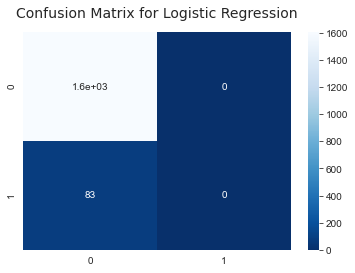

In [84]:
# Having a look at the confusion matrix for Logistic Regression

from sklearn.metrics import confusion_matrix, classification_report
sns.set_style("white")
y_pred_lr = lr.predict(x_test)
cf_matrix = confusion_matrix(y_test, y_pred_lr)
sns.heatmap(cf_matrix, annot=True, cmap="Blues_r")
plt.title("Confusion Matrix for Logistic Regression", fontsize=14, fontname="Helvetica", y=1.04);

In [85]:
# Having  the classification report of Logistic Regression

from sklearn import metrics                                  #metrics
print(metrics.classification_report(y_test, y_pred_lr))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97      1604
           1       0.00      0.00      0.00        83

    accuracy                           0.95      1687
   macro avg       0.48      0.50      0.49      1687
weighted avg       0.90      0.95      0.93      1687



## LINEAR REGRESSION

In [87]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

In [89]:
LinearRegressionScore = lr.score(x_test, y_test)
print("Accuracy obtained by Logistic Regression model:",LinearRegressionScore*100)

Accuracy obtained by Logistic Regression model: 6.5109015894282525


In [90]:
# WORST PERFORMANCE BY LINEAR REGRESSION

## KNN  

In [91]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(x_train, y_train)

KNeighborsClassifier()

In [93]:
KNeighborsClassifierScore = knn.score(x_test, y_test)
print("Accuracy obtained by K Neighbors Classifier :", KNeighborsClassifierScore*100)

Accuracy obtained by K Neighbors Classifier : 94.7836395969176


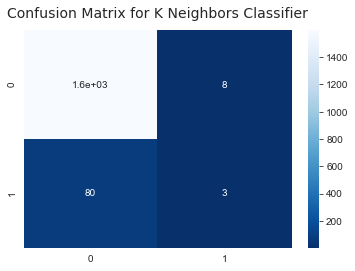

In [95]:
# Confustion Matrix 

y_pred_knn = knn.predict(x_test)
cf_matrix = confusion_matrix(y_test, y_pred_knn)
sns.heatmap(cf_matrix, annot=True, cmap="Blues_r")
plt.title("Confusion Matrix for K Neighbors Classifier", fontsize=14, fontname="Helvetica", y=1.03);

In [96]:
print(metrics.classification_report(y_test,y_pred_knn))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97      1604
           1       0.27      0.04      0.06        83

    accuracy                           0.95      1687
   macro avg       0.61      0.52      0.52      1687
weighted avg       0.92      0.95      0.93      1687



## Decision Tree Classifier

In [98]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier()
tree.fit(x_train, y_train)

DecisionTreeClassifier()

In [100]:
DecisionTreeClassifierScore = tree.score(x_test,y_test)
print("Accuracy obtained by Decision Tree Classifier :", DecisionTreeClassifierScore*100)

Accuracy obtained by Decision Tree Classifier : 93.0646117368109


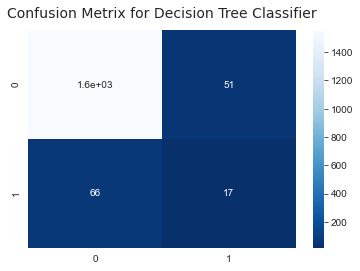

In [101]:
y_pred_tree = tree.predict(x_test)
cf_matrix = confusion_matrix(y_test, y_pred_tree)
sns.heatmap(cf_matrix, annot=True, cmap="Blues_r")
plt.title("Confusion Metrix for Decision Tree Classifier", fontsize=14, fontname="Helvetica", y=1.03);

In [102]:
print(metrics.classification_report(y_test, y_pred_tree));

              precision    recall  f1-score   support

           0       0.96      0.97      0.96      1604
           1       0.25      0.20      0.23        83

    accuracy                           0.93      1687
   macro avg       0.60      0.59      0.59      1687
weighted avg       0.92      0.93      0.93      1687



##  SGD

In [104]:
from sklearn.linear_model import SGDClassifier
sgd = SGDClassifier()
sgd.fit(x_train, y_train)

SGDClassifier()

In [106]:
sgdscore=sgd.score(x_train, y_train)
print("Accuracy obtained by sgd Classifier model:",sgdscore*100)

Accuracy obtained by sgd Classifier model: 95.15045281916447


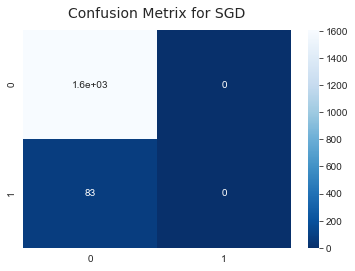

In [125]:
y_pred_SGD = sgd.predict(x_test)
cf_matrix = confusion_matrix(y_test, y_pred_SGD)
sns.heatmap(cf_matrix, annot=True, cmap="Blues_r")
plt.title("Confusion Metrix for SGD", fontsize=14, fontname="Helvetica", y=1.03);

In [126]:
print(metrics.classification_report(y_test, y_pred_SGD));

              precision    recall  f1-score   support

           0       0.95      1.00      0.97      1604
           1       0.00      0.00      0.00        83

    accuracy                           0.95      1687
   macro avg       0.48      0.50      0.49      1687
weighted avg       0.90      0.95      0.93      1687



## RANDOM FOREST CLASSIFIER

In [109]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(x_train, y_train)

RandomForestClassifier()

In [112]:
RandomForestClassifierScore = rfc.score(x_test,y_test)
print("Accuarcy obtained by Random Forest Classifier :", RandomForestClassifierScore*100)

Accuarcy obtained by Random Forest Classifier : 94.8429164196799


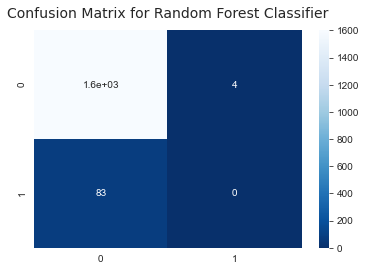

In [115]:
# Confusion Matrix of Random Forest Classifier

y_pred_rfc = rfc.predict(x_test)
cf_matrix = confusion_matrix(y_test, y_pred_rfc)
sns.heatmap(cf_matrix, annot=True, cmap="Blues_r")
plt.title("Confusion Matrix for Random Forest Classifier", fontsize=14, fontname="Helvetica", y=1.03);

In [127]:
print(metrics.classification_report(y_test, y_pred_rfc));

              precision    recall  f1-score   support

           0       0.95      1.00      0.97      1604
           1       0.00      0.00      0.00        83

    accuracy                           0.95      1687
   macro avg       0.48      0.50      0.49      1687
weighted avg       0.90      0.95      0.93      1687



## SVM

In [118]:
from sklearn.svm import SVC
sv=SVC()
sv.fit(x_train,y_train)

SVC()

In [123]:
SVM = sv.score(x_test,y_test)
print("Accuarcy obtained by Random Forest Classifier :", SVM*100)

Accuarcy obtained by Random Forest Classifier : 95.0207468879668


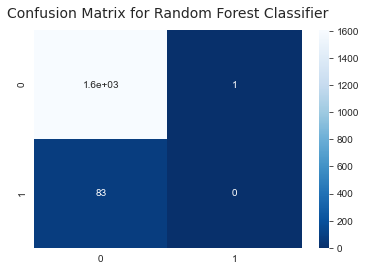

In [124]:
# Confusion Matrix of Random Forest Classifier

y_pred_svm = sv.predict(x_test)
cf_matrix = confusion_matrix(y_test, y_pred_svm)
sns.heatmap(cf_matrix, annot=True, cmap="Blues_r")
plt.title("Confusion Matrix for Random Forest Classifier", fontsize=14, fontname="Helvetica", y=1.03);

In [128]:
print(metrics.classification_report(y_test, y_pred_svm));

              precision    recall  f1-score   support

           0       0.95      1.00      0.97      1604
           1       0.00      0.00      0.00        83

    accuracy                           0.95      1687
   macro avg       0.48      0.50      0.49      1687
weighted avg       0.90      0.95      0.93      1687



## ADABOOST

In [135]:

from sklearn.ensemble import AdaBoostClassifier
Ada = AdaBoostClassifier(n_estimators=2000, random_state = 0)
Ada.fit(x_train, y_train)
    
  

AdaBoostClassifier(n_estimators=2000, random_state=0)

In [138]:
  print('AdaBoost Classifier Training Accuracy:', Ada.score(x_train, y_train)*100)

AdaBoost Classifier Training Accuracy: 96.11451942740287


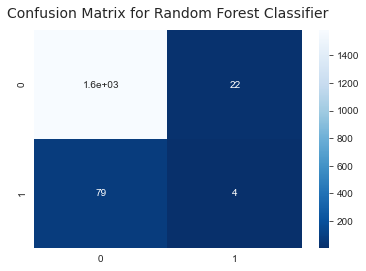

In [139]:
# Confusion Matrix of Random Forest Classifier

y_pred_ada = Ada.predict(x_test)
cf_matrix = confusion_matrix(y_test, y_pred_ada)
sns.heatmap(cf_matrix, annot=True, cmap="Blues_r")
plt.title("Confusion Matrix for Random Forest Classifier", fontsize=14, fontname="Helvetica", y=1.03);

In [140]:
print(metrics.classification_report(y_test, y_pred_ada));

              precision    recall  f1-score   support

           0       0.95      0.99      0.97      1604
           1       0.15      0.05      0.07        83

    accuracy                           0.94      1687
   macro avg       0.55      0.52      0.52      1687
weighted avg       0.91      0.94      0.92      1687

